# 远程推理应用开发示例1

本示例使用LeNet模型远程推理，进行手写数字识别，以图片方式显示结果，简要说明了基于Atlas 200DK 开发板的远程推理应用开发方法之一。

## 主要特点：

1. 编写代码获取输入，如读取读片（目录）、摄像图或视频文件，须分别另行编码实现。本示例使用图片目录；
2. 构造LeNet模型算法对象，调用远程推理接口，多线程推理须另行编码实现；
3. 编码对结果进行后续处理或展示，本示例以图片形式进行展示。

## 远程推理平台
本示例与所使用的远程推理集群服务器均运行在华为云ECS服务器上，集群中的12台Atlas200DK开发板部署于电子科技大学校园。

## 代码示例
【提醒】：注意修改 RemoteIP 和 测试输入 设置。

### 1. 导入软件包 

In [2]:
"""
Inferemote: a Remote Inference Toolkit for Atlas 200DK

"""
import os
import cv2 as cv
import numpy as np

### 2. 实例化LeNet应用算法的对象

In [3]:
''' New an algorithm instance'''
from inferemote.airlab import LeNet
air = LeNet()

### 3. 远程推理设置

In [4]:
''' 指定华为ECS远程推理集群服务器IP地址和模型的服务端口 '''
remote = '192.168.1.123'

''' 关联远程推理端 '''
air.use_remote(remote)

03-18 17:22:20 [INFO]  -atlas- Trying model inference on REMOTE ``192.168.1.123''...


### 4. 设置输入图片目录

In [5]:
''' Read inputs from directory '''

path = './data/mnist'

### 5. 辅助函数

In [6]:
''' 需要对图片文件、图片目录、视频文件、摄像头等分别编码处理 '''

def get_picture_list(path):
    ''' 获取图片列表 '''
    IMG_EXT = ['.jpg', '.JPG', '.png', '.PNG', '.bmp', '.BMP', '.jpeg', '.JPEG']

    if os.path.isdir(path):
        file_list = [os.path.join(path, img) for img in os.listdir(path)
                    if os.path.splitext(img)[1] in IMG_EXT]
    return file_list
    
def show_result(image):
    ''' 显示处理结果图片 '''
    from  matplotlib import pyplot as plt
    image = image [:,:,::-1]         # transform image to rgb
    plt.imshow(image)
    plt.show()

### 6. 进行远程推理并显示结果

03-18 17:22:27 [INFO]  -atlas- Time costs: 0.004/0.021/0.001(s) and 0.026(s) for pre/remote/post and totally.


NUMBER:  1


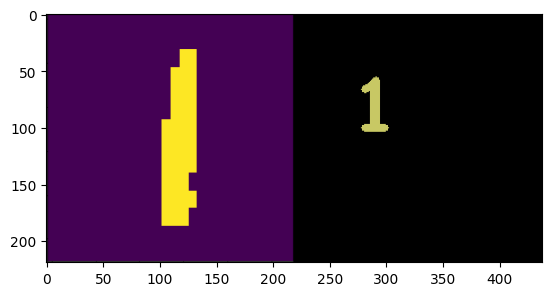

03-18 17:22:28 [INFO]  -atlas- Time costs: 0.000/0.015/0.000(s) and 0.016(s) for pre/remote/post and totally.


NUMBER:  7


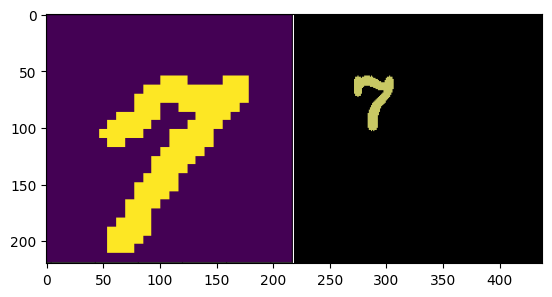

03-18 17:22:28 [INFO]  -atlas- Time costs: 0.000/0.015/0.000(s) and 0.015(s) for pre/remote/post and totally.


NUMBER:  9


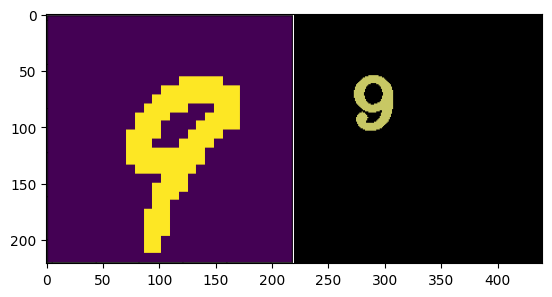

In [7]:
''' Processing the results '''
for pic in get_picture_list(path):
    
    frame = cv.imread(pic)
    
    ''' 调用模型的远程推理接口 '''
    result = air.inference_remote(frame)
    
    ''' 合并图像屏显示 '''
    image = air.make_image(result, frame.shape[:2])
    image = np.hstack([frame, image])
    show_result(image)


In [1]:
# Ends.